In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
import warnings

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
def calc_ols(df1, s1, s2, smoothing):
    
    pair=df1.iloc[:, [s1, s2]]
    pair.dropna(how='any', axis=0, inplace=True)
    
    if smoothing=='yes':
        pair=pair.rolling(window=5).mean()
        pair.dropna(inplace=True)
        
    c=np.polyfit(pair.iloc[:, 0], pair.iloc[:, 1],  1, full=False)
    temp_list=pair.iloc[:, 1]-c[0]*pair.iloc[:, 0]
    
    return c[0], temp_list

In [10]:
def form_title(list1, s1, s2, c):
    
    col_title=list1[s1]+'_'+list1[s2]+'_'+str(round(c,2))
    
    return col_title

In [11]:
warnings.filterwarnings('ignore')
smoothing='no'

if smoothing=='yes':
    scan_results=pd.read_csv('./data/results_smoothing.csv')
else:
    scan_results=pd.read_csv('./data/results.csv') # 1000+ pair

data_file=pd.read_csv('./data/selected.csv') #around 500
data_file['Date']=data_file['Date'].astype('datetime64[ns]')
data_file.set_index('Date', inplace=True)
data_file.index=pd.DatetimeIndex(data_file.index)
 
scan_results=scan_results.loc[scan_results.p_value<0.005]
scan_results.sort_values(by='p_value', inplace=True)
scan_results=scan_results.loc[scan_results.i_sect==scan_results.j_sect]
scan_results.info()

if smoothing=='yes':
    scan_results.to_csv('./data/same_sect_smoothing.csv', index=False) # 300+
else:
    scan_results.to_csv('./data/same_sect.csv', index=False) # 300+

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 23 to 2195
Data columns (total 11 columns):
t_stat     264 non-null float64
p_value    264 non-null float64
CI_1       264 non-null float64
CI_5       264 non-null float64
CI_10      264 non-null float64
i          264 non-null int64
j          264 non-null int64
i_sybl     264 non-null object
j_sybl     264 non-null object
i_sect     264 non-null object
j_sect     264 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 24.8+ KB


In [12]:
temp_list=[]
main_list=[]
title_list=[]

stock_list=data_file.columns.tolist()
ts_database=pd.DataFrame(index=data_file.index)

for num in range(0, len(scan_results.index)):

    i=scan_results.iloc[num, 5]
    j=scan_results.iloc[num, 6]   
    c, temp_list=calc_ols(data_file, i, j, smoothing)
    
    scan_results['i_sybl'].iloc[num]=stock_list[i]
    scan_results['j_sybl'].iloc[num]=stock_list[j]
    
    temp_df=pd.DataFrame(temp_list, index=data_file.index)
    ts_database=pd.concat([ts_database, temp_df], axis=1, join='outer')
    col_title=form_title(stock_list, i, j, c)
    title_list.append(col_title)

ts_database.columns=title_list

In [13]:
ts_database.head()

,COST_MKC_0.56,ABT_RMD_1.84,ORLY_SBUX_0.19,MGM_ULTA_1.9,PGR_SPGI_3.51,APD_BLL_0.31,DHR_IDXX_1.88,ADBE_LRCX_0.74,INTC_VRSN_4.23,KLAC_SNPS_0.9,...,NKE_SBUX_0.83,TAP_WBA_0.86,RSG_WM_1.2,DLR_MAA_0.79,NSC_TDG_2.85,TSCO_VFC_0.67,DRI_MCD_1.76,IRM_PSA_7.88,BABA_BBY_0.38,DISCK_HOG_1.3
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,-1.324752,NaN,NaN,NaN,1.413357,-0.352704,NaN,0.247186,NaN,NaN,...,NaN,-1.342241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-1.416737,NaN,NaN,NaN,1.376719,-0.379204,NaN,0.178838,NaN,NaN,...,NaN,-1.444758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-1.450726,NaN,NaN,NaN,1.459074,-0.353478,NaN,0.035492,NaN,NaN,...,NaN,-1.527556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-1.508717,NaN,NaN,NaN,1.414087,-0.362642,NaN,0.013818,NaN,NaN,...,NaN,-1.454062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,-1.420534,NaN,NaN,NaN,1.369100,-0.362021,NaN,0.000781,NaN,NaN,...,NaN,-1.537287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ts_database.dropna(how='all', axis=0, inplace=True)

if smoothing=='yes':
    ts_database.to_csv('./data/ts_output_smoothing.csv')
else:
    ts_database.to_csv('./data/ts_output.csv')

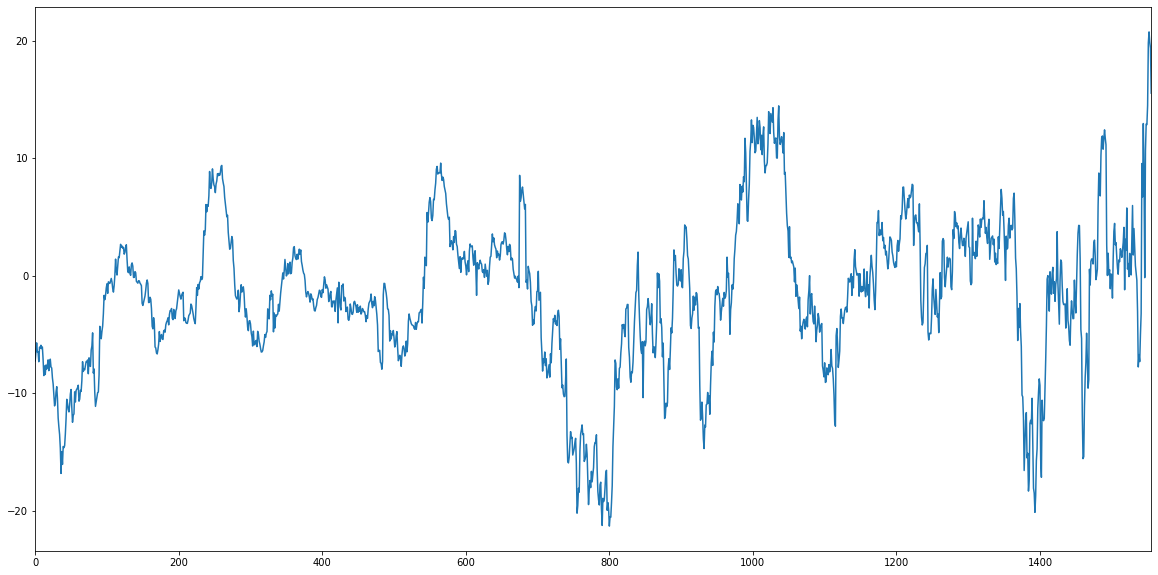

In [284]:
test_target=262
start_pt=0
ts=ts_database.iloc[:, test_target]
#ts=ts['2000-10-31':]
ts.dropna(inplace=True)
ts.reset_index(drop=True, inplace=True)
#ts=ts+30
#ts=np.log(ts)
plt.figure(figsize=(20,10))
ts[start_pt:].plot()
plt.show()

In [285]:
adf_results=adfuller(ts[start_pt:])
print(adf_results)

(-4.003585933497692, 0.0013918502139329096, 17, 1538, {'1%': -3.4346089387222625, '5%': -2.863421059722323, '10%': -2.5677714475929254}, 5721.964233989786)


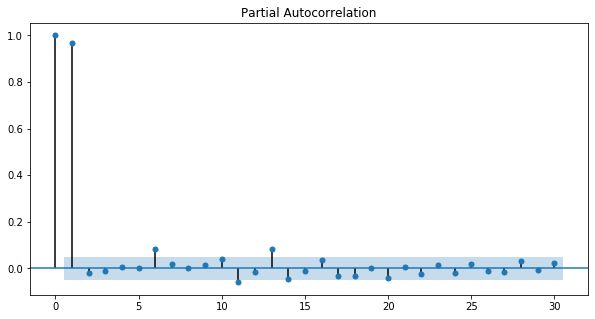

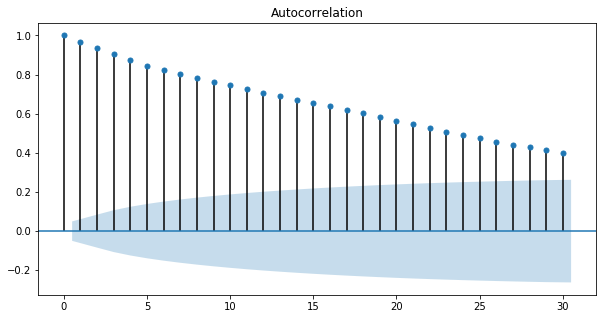

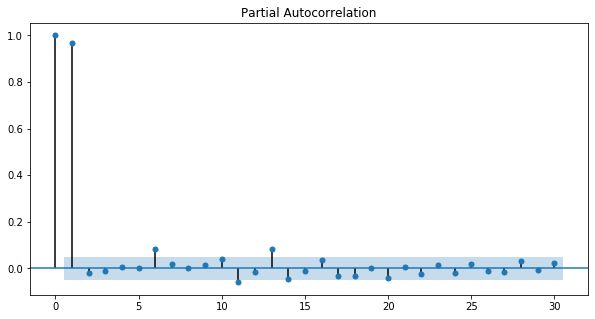

In [286]:
fig, ax=plt.subplots(figsize=(10, 5))
plot_acf(ts[start_pt:], lags=30, ax=ax)
fig, ax1=plt.subplots(figsize=(10, 5))
plot_pacf(ts[start_pt:], lags=30, ax=ax1)

In [342]:
order_aic_bic=[]
for p in range(15):
    for q in range(15):
        try:
            model=SARIMAX(ts[start_pt:], order=(p, 0, q), trend='ct')
            results=model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, np.nan, np.nan))
order_df=pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
order_df=order_df.dropna(axis=0)
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

     p   q           aic           bic
74   4  14   5801.816998   5914.164346
44   2  14   5802.182235   5903.829836
15   1   0   5802.218480   5823.617975
119  7  14   5802.608159   5931.005128
29   1  14   5803.256592   5899.554318
..  ..  ..           ...           ...
4    0   4   6672.097280   6709.546396
3    0   3   7066.927843   7099.027085
2    0   2   7557.987023   7584.736392
1    0   1   8546.277914   8567.677409
0    0   0  10168.484701  10184.534322

[225 rows x 4 columns]
    p  q           aic           bic
15  1  0   5802.218480   5823.617975
16  1  1   5804.204144   5830.953512
30  2  0   5804.206851   5830.956219
31  2  1   5805.610305   5837.709547
45  3  0   5806.136365   5838.235607
.. .. ..           ...           ...
4   0  4   6672.097280   6709.546396
3   0  3   7066.927843   7099.027085
2   0  2   7557.987023   7584.736392
1   0  1   8546.277914   8567.677409
0   0  0  10168.484701  10184.534322

[225 rows x 4 columns]


                               SARIMAX Results                                
Dep. Variable:          BABA_BBY_0.38   No. Observations:                 1556
Model:              SARIMAX(4, 0, 14)   Log Likelihood               -2879.908
Date:                Wed, 25 Nov 2020   AIC                           5801.817
Time:                        10:49:09   BIC                           5914.164
Sample:                             0   HQIC                          5843.594
                               - 1556                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0907      0.097     -0.939      0.348      -0.280       0.099
drift       8.153e-05   8.42e-05      0.969      0.333   -8.34e-05       0.000
ar.L1          0.6802      0.176      3.874      0.0

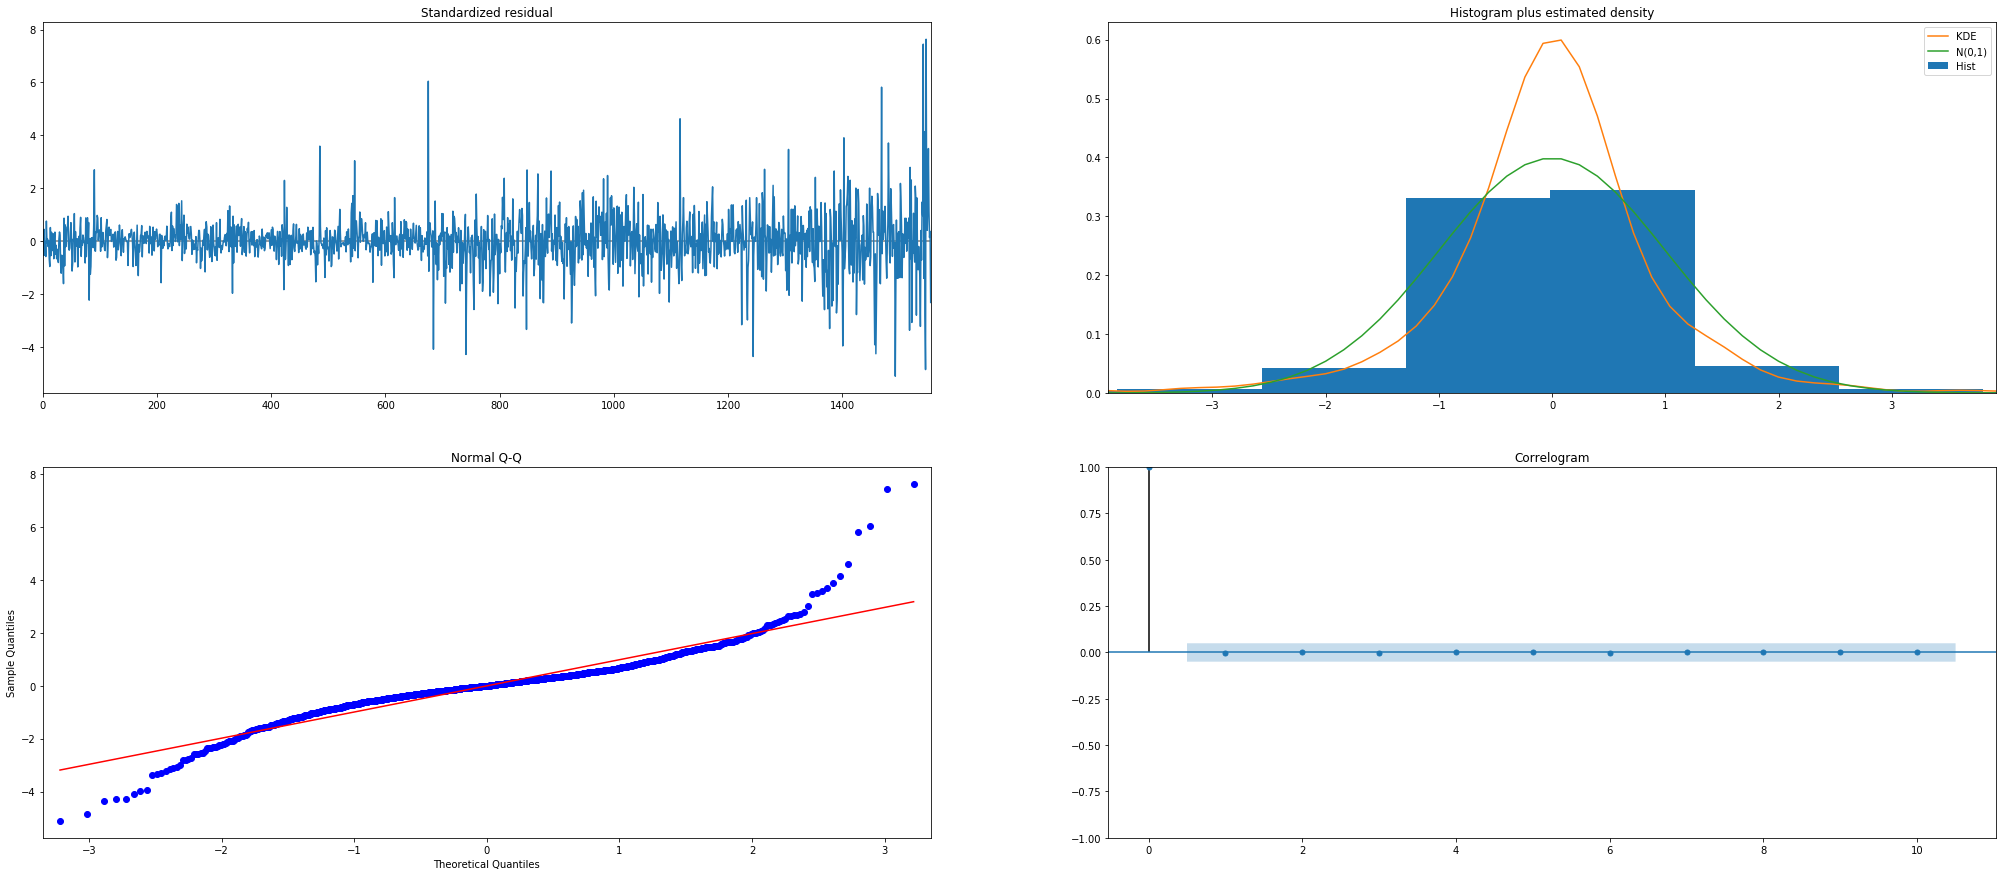

In [345]:
model=SARIMAX(ts[start_pt:], order=(4, 0, 14), trend='ct')
results=model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(35,15))
plt.show()

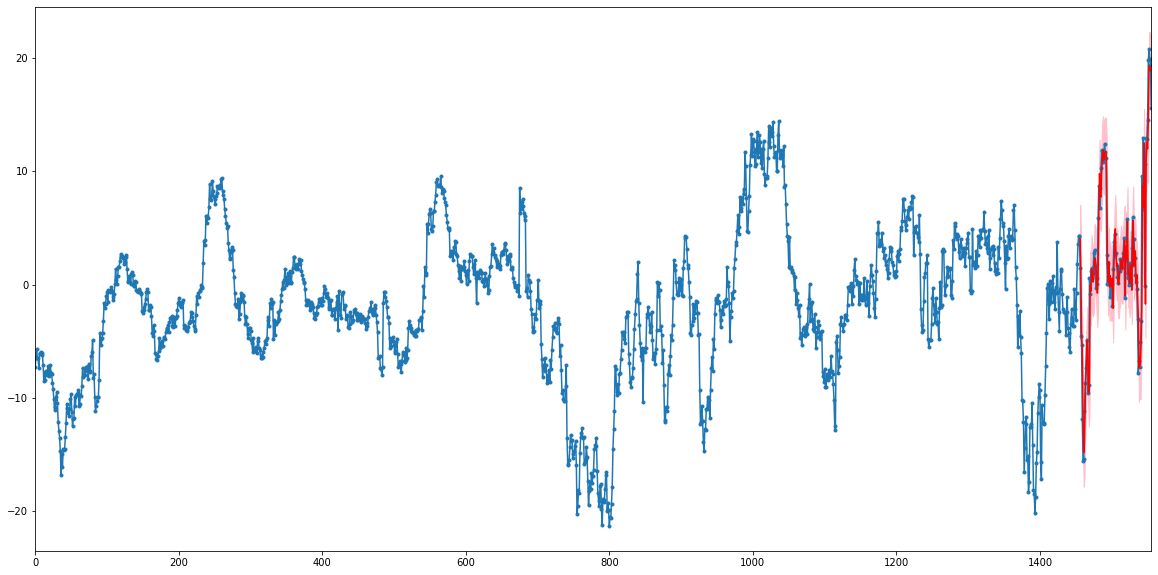

In [300]:
test_start=-100
forecast=results.get_prediction(start=test_start)
y_pred=forecast.predicted_mean
conf_int=forecast.conf_int()
#print(conf_int)

plt.figure(figsize=(20,10))
ts[start_pt:].plot(marker='.')
plt.plot(y_pred.index, y_pred.values, color='red', label='forecast')
col_name=ts_database.columns.tolist()
ci_name=col_name[test_target]
plt.fill_between(conf_int.index, conf_int[f'lower {ci_name}'], conf_int[f'upper {ci_name}'], color='pink')
plt.show()

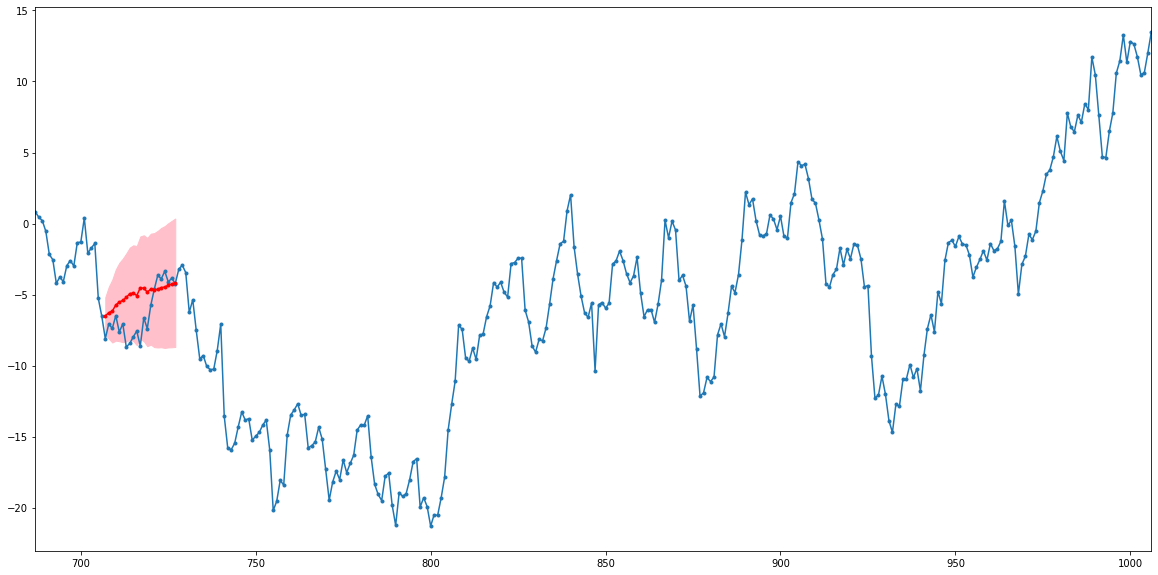

In [357]:
test_start=-1200+337+14
back_forecast=results.get_prediction(start=test_start, end=test_start+20, dynamic=True)
mean_forecast=back_forecast.predicted_mean
conf_intervals=back_forecast.conf_int(alpha=0.40)

plt.figure(figsize=(20,10))
ts[test_start-20:test_start+300].plot(marker='.')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', marker='.', label='forecast')
plt.fill_between(conf_intervals.index, conf_intervals[f'lower {ci_name}'], conf_intervals[f'upper {ci_name}'], color='pink')
plt.show()

In [338]:
print(conf_intervals)

     lower BABA_BBY_0.38  upper BABA_BBY_0.38
536            -4.266818            -1.686249
537            -4.749070            -1.124442
538            -5.140782            -0.745859
539            -5.455164            -0.465633
540            -5.620701            -0.123718
541            -5.825783             0.048621
542            -6.052351             0.155130
543            -6.016657             0.480878
544            -6.202362             0.574275
545            -6.270695             0.759863
546            -6.308238             1.002856
547            -6.381540             1.177092
548            -6.490714             1.275116
549            -6.407966             1.561642
550            -6.451552             1.764213
551            -6.522570             1.900149
552            -6.498748             2.137193
553            -6.533103             2.324836
554            -6.577634             2.487357
555            -6.641958             2.619198
556            -6.631585          